# ASSIGNMENT II - ML WITH PYTHON (AI II)

March 30, 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
data =pd.read_csv('./bank.csv', delimiter=';') 

In [4]:
y = data["y"]
X = data.drop(columns='y')

In [5]:
X.drop(['pdays','contact','duration'],axis = 1, inplace = True)

In [6]:
def plot_data(X, y, title, xlab='Feature 1', ylab='Feature 2', n_features=2):
    colors = ['.r','.g','.b','.y','.m','.c']
    for i, c in zip(range(0, n_features), colors):
        plt.plot(X[y==i,0],X[y==i,1],c)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)

# 1. From the modified dataset in question 2 of the previous assignment (not encoded with the features dropped), and with the help of the provided code, train a RandomForestClassifier (n_estimators=10).
- Obtain the confusion matrix and plot the Precision vs Recall curve.
- Justify the obtained results and the difference between accuracy and the confusion matrix.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [8]:
categorical = X.select_dtypes(include='object').columns
numerical = X.select_dtypes(exclude='object').columns

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clt = make_column_transformer((StandardScaler(), numerical),(OrdinalEncoder(),
categorical))

X_enc_tr = clt.fit_transform(X_train)
X_enc_ts = clt.transform(X_test)

Train a Random Forest and show the accuracy of the model:

In [10]:
from sklearn.ensemble import RandomForestClassifier

ens = RandomForestClassifier(n_estimators=10, random_state=24)
ens.fit(X_enc_tr, y_train)

y_pred = ens.predict(X_enc_ts)

print("RandomForestClassifier training score: {:.3f}".format(ens.score(X_enc_tr,y_train)))
print("RandomForestClassifier test score: {:.3f}".format(ens.score(X_enc_ts,y_test)))
display(pd.DataFrame([ens.feature_importances_],columns=X.columns))

RandomForestClassifier training score: 0.982
RandomForestClassifier test score: 0.892


,age,job,marital,education,default,balance,housing,loan,day,month,campaign,previous,poutcome
0,0.170821,0.18141,0.143835,0.067016,0.043226,0.082395,0.036055,0.04716,0.007428,0.023561,0.015931,0.114521,0.06664


Obtain the confusion matrix:


Confusion matrix: 
[[989  17]
 [105  20]]


Text(0.5, 1.0, 'Original Confusion Matrix')

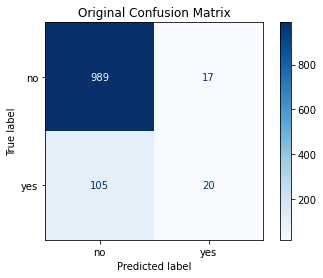

In [11]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n{}".format(conf))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ens, X_enc_ts, y_test, cmap=plt.cm.Blues)
plt.title('Original Confusion Matrix')

Plot the Precision vs Recall curve:

Text(0.5, 1.0, 'Precision vs Recall')

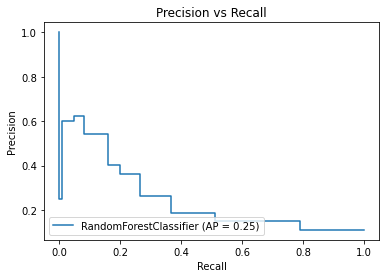

In [12]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(ens,X_enc_ts,y_test)
plt.title('Precision vs Recall')

Justify the obtained results and the difference between accuracy and the confusion matrix:

Our model shows a test accuracy of 0.892, which would usually be relalated to a high performing model. However, given that our dataset is quite imbalanced (as established in assignment 1), this metric is trivial and should not be used to evaluate the model performance. This is due to the fact  that accuracy is the fraction of predictions our model got right. The model might be great at classifying the majority class, but bad at classifying the minority class and would still achieve a high accuracy score.

The confusion matrix shows the predicted vs. actual lables of the target variable. Unlike the accuracy metric, the confusion matrix gives detailed insight into how well the classifier works. For example, we can see that our model is very good at predicting the majority class 'no' (989 correct, 17 incorrect), but quite bad at predicting the minority class 'yes' (105 incorrect, 20 correct). 

The precision vs recall curve shows the trade off between precision and recall. As we can see, the average precision (AP) is 0.25 and either metric needs to be very low to achieve a high score on the other. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. In this case, the area under the curve is small, suggesting  that the classifier is neither returning accurate results (low precision), nor returning a majority of all positive results (low recall).

# 2. Apply a PCA with 4 components, how much variance from the original dataset is represented in the new 4 components?

In [13]:
from sklearn.decomposition import PCA

In [14]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_enc_tr)

pca = PCA(n_components= 4, random_state=42).fit(X_train_s)
X_pca = pca.transform(X_train_s)

print("Variance of the dataset for each PCA component: {}".format(pca.explained_variance_ratio_))


Variance of the dataset for each PCA component: [0.13220423 0.11466425 0.11114439 0.08688133]


In [15]:
variance = 0
for i in pca.explained_variance_ratio_:
    variance = variance + i
print("Variance explained: {}%".format(round(variance*100, 2)))


Variance explained: 44.49%


In [16]:
display(pd.DataFrame(pca.components_, columns=X.columns))

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,previous,poutcome
0,-0.096125,0.071368,-0.173793,-0.216841,0.630514,-0.059721,0.100617,0.051664,-0.041523,0.205058,-0.034879,0.188607,-0.643407
1,0.555403,0.024676,-0.086831,-0.093320,0.013488,-0.314040,-0.598089,-0.408603,0.021949,0.085219,0.098382,0.180212,-0.036072
2,0.414132,0.239291,0.025954,0.010843,0.185222,0.314899,-0.154783,0.224849,-0.123935,-0.551282,-0.182278,-0.420924,-0.181069
3,-0.011778,0.192827,0.593162,0.602065,0.147104,-0.222250,0.017397,-0.131339,-0.330176,0.135872,-0.141571,0.000203,-0.110676


The  4 new  components  explain 44.49% or almost half the variance from the original dataset.

# 3. Using the PCA transformation and a RandomForestClassifier (n_estimators=10), score the model (accuracy) and compute/plot the confusion matrix.
- Justify the obtained results and the difference between accuracy and the confusion matrix.
- Is there an improvement if compared to exercise 1?

In [17]:
from sklearn.decomposition import PCA

X_test = pca.transform(X_enc_ts)

ens_pca = RandomForestClassifier(n_estimators=10, random_state=42)
ens_pca.fit(X_pca, y_train)

y_pred = ens_pca.predict(X_test)

print("RandomForestClassifier training score: {:.3f}".format(ens_pca.score(X_pca,y_train)))
print("RandomForestClassifier test score: {:.3f}".format(ens_pca.score(X_test,y_test)))

RandomForestClassifier training score: 0.982
RandomForestClassifier test score: 0.875


Justify the obtained results and the difference between accuracy and the confusion matrix:

Text(0.5, 1.0, 'PCA Confusion Matrix')

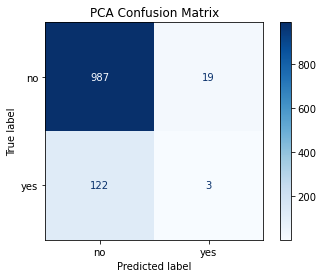

In [18]:
plot_confusion_matrix(ens_pca, X_test, y_test, cmap=plt.cm.Blues)
plt.title('PCA Confusion Matrix')

Is there an improvement if compared to exercise 1?

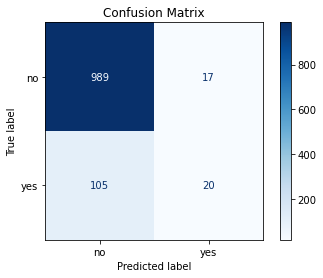
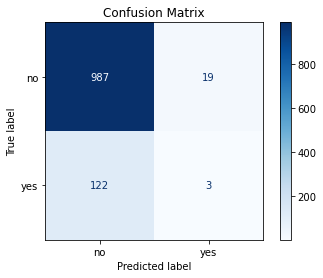

The accurcy using the PCA factors is 0.875 vs 0.892 using the original dataset. Therefore, the accuracy barely suffered despite losing more than 50% of variance. However, as established in the previous questions, accuracy is not a suitable metric for this dataset, as it is heavily imbalanced.

When comparing the confusion matrices, we can see that the classifier's performance actually deteriorated. Before using PCA it only incorrectly classified 17 'no' vs. 19 'no' after applying PCA. Similarly, the original model incorrectly classified 105 'yes' as 'no' and after the PCA this number rose to 122 (only 3 'yes' were correctly labeled'. 

# 4. Using GridSearchCV optimize the model to maximize 'recall', once it is optimized obtain the best parameters, a classification report of the model and the confusion matrix.
(Optional) use the 'balanced_accuracy_score' function to verify/extract more conclusions

Note: We chose to optimize our model from question 1, as it yielded slightly better results than the model in question 3.



In [19]:
# obtain the best parameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
parameters_rf = {'criterion':['gini'], 'n_estimators':[10,20], 'max_depth':[5,6,7]}


In [20]:
rgs = GridSearchCV(rf, parameters_rf, scoring='recall_macro', n_jobs=-1) 
rgs.fit(X_enc_tr , y_train)
print("Best parameters for recall score: {}".format(rgs.best_params_))
print("Best recall (macro): {}".format(rgs.best_score_))

Best parameters for recall score: {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 10}
Best recall (macro): 0.5349699927111349


In [21]:
#classification report of the model
best_model = rgs.best_estimator_
y_pred = best_model.predict(X_enc_ts)
from sklearn.metrics import classification_report, precision_score,recall_score
report = classification_report(y_test, y_pred)
print("Report: \n{}".format(classification_report(y_test, y_pred)))


#confusion matrix
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n{}".format(conf))

Report: 
              precision    recall  f1-score   support

          no       0.90      0.99      0.94      1006
         yes       0.53      0.07      0.13       125

    accuracy                           0.89      1131
   macro avg       0.71      0.53      0.53      1131
weighted avg       0.86      0.89      0.85      1131

Confusion matrix: 
[[998   8]
 [116   9]]


# 5. Using the provided code, the StratifiedKFold and GridSearchCV functions; optimize and validate the model with the recall metric.
- Justify the obtained results and compare them with the ones obtained in question 1 and 3.
- (Optional) obtain the confusion matrix and the report from the model with higher score.

_NOTE: We only managed to run this exercise once due to lack of computer capacity and power even though we used both Jupyter Notebooks and Google Colab. Hence, we will use the results obtained in our succesful attempt to answer the question even though they are not displayed in the notebook._ 

In [22]:
y = y.replace("no", 0)
y = y.replace("yes", 1)

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


pipe = Pipeline(steps=[('pre',make_column_transformer((StandardScaler(), numerical),
(OrdinalEncoder(), categorical))),('SVM',SVC())])
parameters_rf = {'SVM__kernel':['linear','rbf'],'SVM__C':np.linspace(0.01,10,5),
'SVM__gamma':np.linspace(0.01,10,5)}

kf = StratifiedKFold(shuffle=True, n_splits = 5,random_state=42)
rgs = GridSearchCV(pipe, parameters_rf, scoring='recall')
cv = cross_validate(rgs, X, y, cv=kf, n_jobs=4, return_estimator=True)

best_model = rgs.best_estimator_
y_pred_recall = best_model.predict(X_enc_ts)

print('Recall Score:', recall_score(y_test, y_pred_recall))
print('Precision Score:', precision_score(y_test, y_pred_recall))
print('Accuracy:', accuracy_score(best_model.predict(X_enc_ts),y_test))

Here, we optimize and validate our model by using StratifiedKFold and GridSearchCV functions, however, in this case, the best recall we managed to get is only 1%, a really underpreforming result. 

Moreover, compared with the results from Q1 and Q3, we get worse results on both precision and recall. 

**Optional question**

In [ ]:
best_model = rgs.best_estimator_
y_pred_recall = best_model.predict(X_enc_ts)
report = classification_report(y_test, y_pred_recall)
print(report)

from sklearn.metrics import confusion_matrix
plot_confusion_matrix(best_model, X_enc_ts, y_test, cmap=plt.cm.Blues,normalize='true') 
plt.title('Confusion Matrix')